In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Omkar Gadade\Downloads\Imarticus Excel\ Python\ML\extended_data.csv")
df.head()

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0
2,2002,Ford,Mustang GT,Coupe,16.0,0,26250.0,0
3,2012,BMW,428 Gran Coupe i xDrive,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,SL-Class SL500 Roadster,Convertible,18.0,1,100000.0,1


In [3]:
df.shape

(28143, 8)

In [4]:
df.isnull().sum()

model_year           0
brand                0
model                0
type                 0
miles_per_gallon    17
premium_version      0
msrp                17
collection_car       0
dtype: int64

In [5]:
df.dropna(subset=['miles_per_gallon', 'msrp'], axis=0, inplace=True)

In [6]:
df.reset_index(inplace=True)

In [7]:
df.isnull().sum()/df.shape[0]*100

index               0.0
model_year          0.0
brand               0.0
model               0.0
type                0.0
miles_per_gallon    0.0
premium_version     0.0
msrp                0.0
collection_car      0.0
dtype: float64

In [8]:
df["brand"].value_counts()[1]

1949

In [9]:
df[df.duplicated]

,index,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car


In [10]:
df[['msrp']]

,msrp
0,84900.0
1,35000.0
2,26250.0
3,45000.0
4,100000.0
...,...
28121,200000.0
28122,25000.0
28123,199000.0
28124,63700.0


In [11]:
cat = []
num = []

for i in df.columns:
    if df[i].nunique()<=10:
        cat.append(i)
    else:
        num.append(i)

In [12]:
cat

['type', 'premium_version', 'collection_car']

In [13]:
num

['index', 'model_year', 'brand', 'model', 'miles_per_gallon', 'msrp']

In [14]:
df.nunique()

index               28126
model_year             36
brand                  57
model                1898
type                    9
miles_per_gallon      121
premium_version         2
msrp                 2950
collection_car          2
dtype: int64

In [15]:
df

,index,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0
2,2,2002,Ford,Mustang GT,Coupe,16.0,0,26250.0,0
3,3,2012,BMW,428 Gran Coupe i xDrive,Sedan,27.0,1,45000.0,0
4,4,2008,Mercedes-Benz,SL-Class SL500 Roadster,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...,...,...
28121,28138,2017,Bentley,Huracan LP580-2S,Coupe,21.0,1,200000.0,1
28122,28139,2001,Mazda,RX-8 Sport,Coupe,18.0,0,25000.0,0
28123,28140,2018,Ford,Model X P100D,SUV,94.0,1,199000.0,1
28124,28141,2022,Land,Rover Range Rover Velar P380 SE R-Dynamic,SUV,20.0,1,63700.0,0


<Axes: >

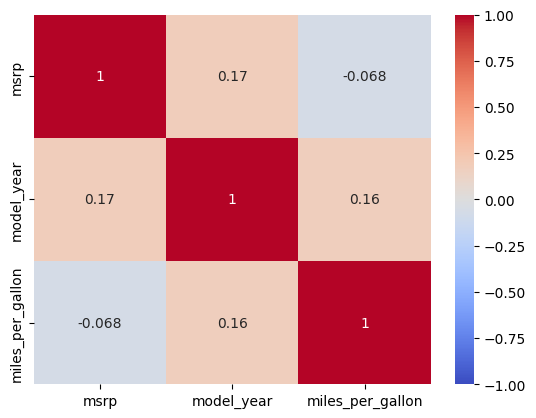

In [16]:
corr_df = df[['msrp', 'model_year', 'miles_per_gallon']].corr()
sns.heatmap(corr_df, vmin= -1.0, annot=True, cmap='coolwarm')

In [17]:
df[['msrp','model_year','miles_per_gallon']].corr()

,msrp,model_year,miles_per_gallon
msrp,1.000000,0.173006,-0.068152
model_year,0.173006,1.000000,0.164104
miles_per_gallon,-0.068152,0.164104,1.000000


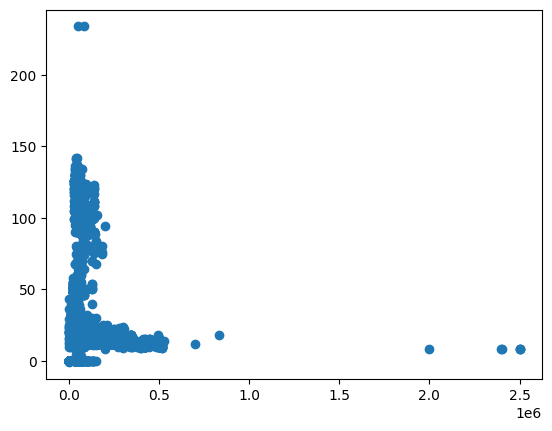

In [18]:
plt.scatter(df['msrp'], df['miles_per_gallon'])

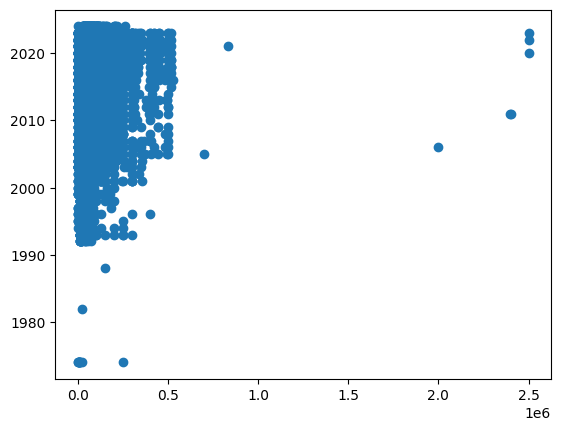

In [19]:
plt.scatter(df['msrp'], df['model_year'])

In [20]:
df.drop('model', axis=1, inplace=True)

In [21]:
df.head()

,index,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car
0,0,2016,Toyota,SUV,13.0,1,84900.0,0
1,1,2014,RAM,Van,15.0,0,35000.0,0
2,2,2002,Ford,Coupe,16.0,0,26250.0,0
3,3,2012,BMW,Sedan,27.0,1,45000.0,0
4,4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1


In [22]:
df.tail()

,index,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car
28121,28138,2017,Bentley,Coupe,21.0,1,200000.0,1
28122,28139,2001,Mazda,Coupe,18.0,0,25000.0,0
28123,28140,2018,Ford,SUV,94.0,1,199000.0,1
28124,28141,2022,Land,SUV,20.0,1,63700.0,0
28125,28142,2020,Audi,Sedan,22.0,1,83500.0,0


In [23]:
#!pip install category_encoders; do it on brand columns as it has around 57 unique categories wrt msrp

In [24]:
#import category_encoders as ce

In [25]:
#for now doing One_Hot_Encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
Ohe = OneHotEncoder(sparse_output=False)

In [28]:
Type = Ohe.fit_transform(df[['type']])

In [29]:
Type

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [30]:
Type_df = pd.DataFrame(Type, columns=Ohe.categories_)

In [31]:
Type_df

,Convertible,Coupe,Hatchback,Minivan,Pickup,SUV,Sedan,Van,Wagon
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
28121,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28122,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28123,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28124,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
Brands = Ohe.fit_transform(df[['brand']])

In [33]:
Brands

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
Brands_df = pd.DataFrame(Brands, columns=Ohe.categories_)

In [35]:
Brands_df

,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28121,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df

,index,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car
0,0,2016,Toyota,SUV,13.0,1,84900.0,0
1,1,2014,RAM,Van,15.0,0,35000.0,0
2,2,2002,Ford,Coupe,16.0,0,26250.0,0
3,3,2012,BMW,Sedan,27.0,1,45000.0,0
4,4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...,...
28121,28138,2017,Bentley,Coupe,21.0,1,200000.0,1
28122,28139,2001,Mazda,Coupe,18.0,0,25000.0,0
28123,28140,2018,Ford,SUV,94.0,1,199000.0,1
28124,28141,2022,Land,SUV,20.0,1,63700.0,0


In [37]:
df = pd.concat([df, Type_df, Brands_df], axis=1)

In [38]:
df.head()

,index,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car,"(Convertible,)","(Coupe,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,0,2016,Toyota,SUV,13.0,1,84900.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2014,RAM,Van,15.0,0,35000.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2002,Ford,Coupe,16.0,0,26250.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2012,BMW,Sedan,27.0,1,45000.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df.tail()

,index,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car,"(Convertible,)","(Coupe,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
28121,28138,2017,Bentley,Coupe,21.0,1,200000.0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28122,28139,2001,Mazda,Coupe,18.0,0,25000.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28123,28140,2018,Ford,SUV,94.0,1,199000.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28124,28141,2022,Land,SUV,20.0,1,63700.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28125,28142,2020,Audi,Sedan,22.0,1,83500.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df.drop(['brand','type'], axis=1, inplace=True)

In [41]:
df.head()

,index,model_year,miles_per_gallon,premium_version,msrp,collection_car,"(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,0,2016,13.0,1,84900.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2014,15.0,0,35000.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2002,16.0,0,26250.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2012,27.0,1,45000.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2008,18.0,1,100000.0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr_model = LinearRegression()

In [44]:
df.columns

Index([           'index',       'model_year', 'miles_per_gallon',
        'premium_version',             'msrp',   'collection_car',
         ('Convertible',),         ('Coupe',),     ('Hatchback',),
             ('Minivan',),        ('Pickup',),           ('SUV',),
               ('Sedan',),           ('Van',),         ('Wagon',),
               ('Acura',),          ('Alfa',),         ('Aston',),
                ('Audi',),           ('BMW',),       ('Bentley',),
             ('Bugatti',),         ('Buick',),      ('Cadillac',),
           ('Chevrolet',),      ('Chrysler',),         ('Dodge',),
                ('FIAT',),       ('Ferrari',),          ('Ford',),
                 ('GMC',),       ('Genesis',),         ('Honda',),
              ('Hummer',),       ('Hyundai',),      ('INFINITI',),
              ('Jaguar',),          ('Jeep',),         ('Karma',),
                 ('Kia',),   ('Lamborghini',),          ('Land',),
               ('Lexus',),       ('Lincoln',),         ('Lotus

In [45]:
X_df = df.drop('msrp', axis=1)
X_df

,index,model_year,miles_per_gallon,premium_version,collection_car,"(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,0,2016,13.0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2014,15.0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2002,16.0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2012,27.0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2008,18.0,1,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28121,28138,2017,21.0,1,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28122,28139,2001,18.0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28123,28140,2018,94.0,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28124,28141,2022,20.0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
X = X_df.values

In [47]:
X

array([[0.0000e+00, 2.0160e+03, 1.3000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 2.0140e+03, 1.5000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 2.0020e+03, 1.6000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.8140e+04, 2.0180e+03, 9.4000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.8141e+04, 2.0220e+03, 2.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.8142e+04, 2.0200e+03, 2.2000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [48]:
df

,index,model_year,miles_per_gallon,premium_version,msrp,collection_car,"(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,0,2016,13.0,1,84900.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2014,15.0,0,35000.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2002,16.0,0,26250.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2012,27.0,1,45000.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2008,18.0,1,100000.0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28121,28138,2017,21.0,1,200000.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28122,28139,2001,18.0,0,25000.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28123,28140,2018,94.0,1,199000.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28124,28141,2022,20.0,1,63700.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
y_df = df['msrp']
y_df

0         84900.0
1         35000.0
2         26250.0
3         45000.0
4        100000.0
           ...   
28121    200000.0
28122     25000.0
28123    199000.0
28124     63700.0
28125     83500.0
Name: msrp, Length: 28126, dtype: float64

In [50]:
y= y_df.values

In [51]:
y

array([ 84900.,  35000.,  26250., ..., 199000.,  63700.,  83500.])

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [54]:
X_train

array([[1.5960e+04, 2.0090e+03, 2.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.0560e+03, 2.0200e+03, 1.8000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0933e+04, 2.0220e+03, 1.5000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [9.8500e+03, 2.0150e+03, 1.9000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0804e+04, 2.0090e+03, 2.1000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.7320e+03, 2.0210e+03, 1.6000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [55]:
y_train

array([ 35000., 114000., 250000., ...,  42900.,  65500.,  68000.])

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22500, 71)
(5626, 71)
(22500,)
(5626,)


In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr_model= LinearRegression()

In [59]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_train_predict = lr_model.predict(X_train)

In [61]:
y_train_predict

array([ 32722.50129031,  69365.996934  , 237883.87078627, ...,
        60100.77178296,  36748.51624103,  55713.08070069])

In [63]:
y_test_predict = lr_model.predict(X_test)

In [64]:
y_test_predict

array([ 96543.03929497,  90067.11399143,  51324.12415724, ...,
       149187.25299338,  19813.26451702,  54249.02774183])

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [67]:
mse_train=mean_squared_error(y_train_predict,y_train)
rmse_train= mean_squared_error(y_train_predict,y_train)**0.5
mae_train= mean_absolute_error(y_train_predict,y_train)

print(mse_train)
print(rmse_train)
print(mae_train)

1242536717.89819
35249.6342945312
16484.96275481593


In [68]:
mse_test= mean_squared_error(y_test_predict, y_test)
rmse_test= mean_squared_error(y_test_predict, y_test)**0.5
mae_test= mean_absolute_error(y_test_predict, y_test)

print(mse_test)
print(rmse_test)
print(mae_test)

877221058.143512
29617.917856316504
16686.248850344826
